# Week 42 - Assignment 4
###### -------- use "MOD55-WEEK_40-ASSIGNMENT_3" as reference --------

Part 1: Data Acquisition and Preprocessing
- Run Support Vector Machine (SVM) on previous assignment on sleep quality

In [1]:
# -------- LIBRARIES --------

## For numerical operations
import numpy as np
## For data manipulation
import pandas as pd
## For data visualization
import matplotlib.pyplot as plt
## For splitting data
from sklearn.model_selection import train_test_split
## For feature scaling
from sklearn.preprocessing import StandardScaler
## For Logistic Regression model
from sklearn.linear_model import LogisticRegression
## For model evaluation
from sklearn.metrics import accuracy_score, classification_report
## For confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## For ROC/AUC
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


In [2]:
# -------- DATASET --------

## Read dataset CSV file
sleep_csv = pd.read_csv(
    r"C:\Users\natha\UiS - MOD550\Week_41_lecture - logistic_regression\Sleep_health_and_lifestyle_dataset.csv"
    )

## Convert to dataframe
sleep_df = pd.DataFrame(sleep_csv)

## Print features list
print(sleep_df.columns)


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [3]:
# -------- DATASET PREVIEW --------

## Print dataframe preview
print(sleep_df)


     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28           PhD Student             6.2   
2            3    Male   28           PhD Student             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59        Master Student             8.1   
370        371  Female   59        Master Student             8.0   
371        372  Female   59        Master Student             8.1   
372        373  Female   59        Master Student             8.1   
373        374  Female   59        Master Student             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [4]:
# -------- TARGET PREVIEW --------

## Print quality of sleep value counts
print(sleep_df["Quality of Sleep"].value_counts())

Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64


In [5]:
# -------- DATA CLEANING --------
"""
Features list: type = object, [
    'Person ID',
    'Gender',
    'Age',
    'Occupation', 
    'Sleep Duration',
    'Quality of Sleep',
    'Physical Activity Level',
    'Stress Level',
    'BMI Category',
    'Blood Pressure',
    'Heart Rate',
    'Daily Steps',
    'Sleep Disorder'
    ]
Unnecessary features to drop: 'Person ID'
Target variable: 'Quality of Sleep' [range from 0 to 10]
"""
## Turn empty strings into NaN values
sleep_df = sleep_df.replace(r'^\s*$', np.nan, regex=True)

## Drop unnecessary features
sleep_df = sleep_df.drop(columns = ["Person ID"])


In [6]:
# -------- LOGISTIC REGRESSION --------
"""
Logistic Regression basics and implementation
Reference 1: https://www.w3schools.com/python/python_ml_logistic_regression.asp
Reference 2: https://www.geeksforgeeks.org/machine-learning/ml-logistic-regression-using-python/
Youtube video: https://www.youtube.com/watch?v=GAiMnImkIZM&t=910s
"""

## Assign random constant for reproducibility
RSEED = 44
np.random.seed(RSEED)

## Define test size percentage
test_percentage = 0.20

## Define features matrix (drop first to avoid index)
X = pd.get_dummies(
    sleep_df.drop(columns = ["Quality of Sleep"]),
    drop_first = True
)

## Define target variable
y = sleep_df["Quality of Sleep"]

## Turning quality into binary classification for logistic regression
"""
0 = "Quality of Sleep" from 0 to 6 (<=6) --> "Problematic Sleep Quality"
1 = "Quality of Sleep" from 7 to 10 (>=7) --> "Acceptable Sleep Quality"
"""
sleep_df["Quality of Sleep"] = pd.to_numeric(
    sleep_df["Quality of Sleep"],
    errors="coerce"
)

## Define binary target variable
y_binary = (sleep_df["Quality of Sleep"] >= 7).astype(int)
print(y_binary.value_counts())

## Train-test split for binary classification (20% test size)
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y_binary,
    test_size = test_percentage,
    random_state = RSEED,
    stratify = y_binary
)
print(f"Training set size: {(1 - test_percentage) * 100} %")
print(f"Train set distribution: {y_train.value_counts()}")
print(f"Test set size: {test_percentage * 100} %")
print(f"Test set distribution: {y_test.value_counts()}")

## Standardize features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## Initialize logistic regression model
LogReg = LogisticRegression()

## Train the model
LogReg.fit(X_train_scaled, y_train)

## Model predictions
y_pred_logreg = LogReg.predict(X_test_scaled)
y_prob_logreg = LogReg.predict_proba(X_test_scaled)[:, 1]


Quality of Sleep
1    257
0    117
Name: count, dtype: int64
Training set size: 80.0 %
Train set distribution: Quality of Sleep
1    205
0     94
Name: count, dtype: int64
Test set size: 20.0 %
Test set distribution: Quality of Sleep
1    52
0    23
Name: count, dtype: int64



Logistic Regression Accuracy: 98.67%

Confusion Matrix (LogReg):
[[23  0]
 [ 1 51]]


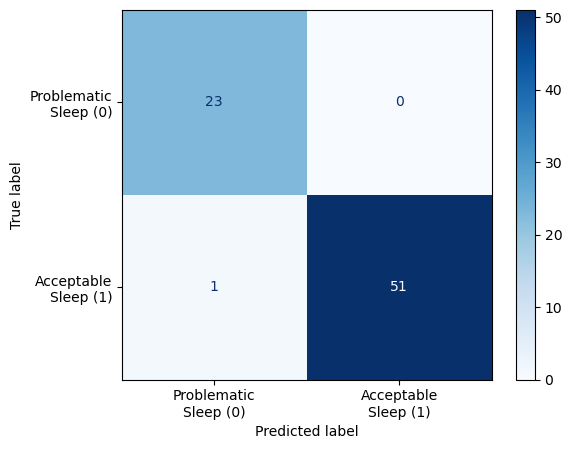


Classification Report (LogReg):
                       precision    recall  f1-score   support

Problematic Sleep (0)       0.96      1.00      0.98        23
 Acceptable Sleep (1)       1.00      0.98      0.99        52

             accuracy                           0.99        75
            macro avg       0.98      0.99      0.98        75
         weighted avg       0.99      0.99      0.99        75



In [7]:
# -------- METRICS & EVALUATION --------

## Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("\nLogistic Regression Accuracy: {:.2f}%".format(accuracy_logreg * 100))

## Confusion Matrix
print("\nConfusion Matrix (LogReg):")
print(confusion_matrix(y_test, y_pred_logreg))

cm_display = ConfusionMatrixDisplay.from_estimator(
    LogReg,       # your trained model (e.g., LogisticRegression, RandomForest)
    X_test_scaled,          # test features
    y_test,                 # true labels
    display_labels = ["Problematic\nSleep (0)", "Acceptable\nSleep (1)"],
    cmap="Blues"
)
plt.show()

## Classification Report
print("\nClassification Report (LogReg):")
print(classification_report(
    y_test,
    y_pred_logreg,
    target_names=["Problematic Sleep (0)", "Acceptable Sleep (1)"]
    )
)

In [8]:
# -------- LOG-ODDS COEFFICIENTS --------

## Coefficients represent log-odds contribution of each feature for each class
coef_df = pd.DataFrame(LogReg.coef_, columns=X.columns, index=["Acceptable Sleep"])
print("Logistic Regression Coefficients (log-odds):")
print(coef_df)

## Log-odds coefficients ranking
coef_ranking = coef_df.T.sort_values(by="Acceptable Sleep", ascending=False)
print("Log-Odds Coefficients Ranking (Most Positive to Most Negative):")
print(coef_ranking)

Logistic Regression Coefficients (log-odds):
                       Age  Sleep Duration  Physical Activity Level  \
Acceptable Sleep  0.664319        1.643705                 0.725869   

                  Stress Level  Heart Rate  Daily Steps  Gender_Male  \
Acceptable Sleep     -1.448216    -1.06196    -0.201308    -0.629463   

                  Occupation_Engineer  Occupation_Lawyer  Occupation_Manager  \
Acceptable Sleep             0.055322           0.369691            0.060001   

                  ...  Blood Pressure_130/86  Blood Pressure_131/86  \
Acceptable Sleep  ...              -0.164715              -0.002333   

                  Blood Pressure_132/87  Blood Pressure_135/88  \
Acceptable Sleep              -0.158863               0.225226   

                  Blood Pressure_135/90  Blood Pressure_139/91  \
Acceptable Sleep               0.363899               0.104517   

                  Blood Pressure_140/90  Blood Pressure_140/95  \
Acceptable Sleep               

In [9]:
# -------- ODDS RATIOS --------

## Convert coefficients to odds ratios for easier interpretation
odds_ratios = np.exp(coef_df)
print("Logistic Regression Odds Ratios:")
print(odds_ratios)

## Log-odds coefficients ranking
ratios_ranking = coef_df.T.sort_values(by="Acceptable Sleep", ascending=False)
print("Odds Ratios Ranking (Most Positive to Most Negative):")
print(ratios_ranking)

Logistic Regression Odds Ratios:
                       Age  Sleep Duration  Physical Activity Level  \
Acceptable Sleep  1.943166        5.174307                 2.066527   

                  Stress Level  Heart Rate  Daily Steps  Gender_Male  \
Acceptable Sleep      0.234989    0.345777     0.817661     0.532878   

                  Occupation_Engineer  Occupation_Lawyer  Occupation_Manager  \
Acceptable Sleep             1.056881           1.447287            1.061838   

                  ...  Blood Pressure_130/86  Blood Pressure_131/86  \
Acceptable Sleep  ...               0.848135                0.99767   

                  Blood Pressure_132/87  Blood Pressure_135/88  \
Acceptable Sleep               0.853114               1.252606   

                  Blood Pressure_135/90  Blood Pressure_139/91  \
Acceptable Sleep               1.438928               1.110174   

                  Blood Pressure_140/90  Blood Pressure_140/95  \
Acceptable Sleep               0.907719    

From the previous output, we can interpret the log-odds coefficient and odds ratios as follows:
- More positive log-odds coefficient and high odds ratio indicates that feature increases the chances of being classified as "Acceptable".
- More negative log-odds coefficient and low odds ratio indicates that the feature decreases the chances of being classified as "Acceptable".

Therefore, this can be interpreted as weights of features, which would result with the following:

    1. Sleep Duration

    2. Physical Activity Level

    3. Age

    4. Occupation

    5. Blood Pressure

    6. BMI


Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve\nLogistic Regression')

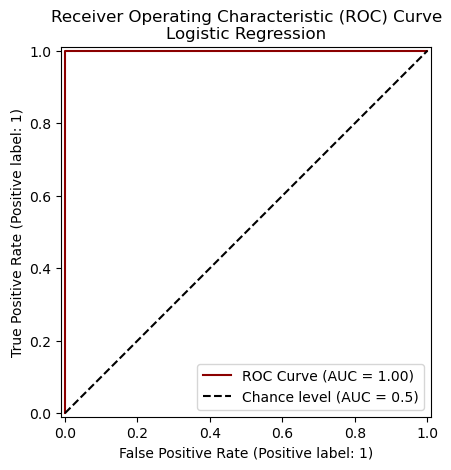

In [10]:
# -------- ROC/AUC CURVE --------
"""
Receiver Operating Characteristic (ROC) Curve
&
Area Under the Curve (AUC)
"""

y_prob_logreg = LogReg.predict_proba(X_test_scaled)[:, 1]

## Use RocCurveDisplay for plotting ROC curve
roc_display = RocCurveDisplay.from_estimator(
    LogReg,
    X_test_scaled,
    y_test,
    name = "ROC Curve",
    color="darkred",
    plot_chance_level = True
)
roc_display.ax_.set_title("Receiver Operating Characteristic (ROC) Curve\nLogistic Regression")


In [ ]:
# -------- SVM ANALYSIS --------

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from pltsvm import plot_svm_results

# ========================================================================
# --- SEQUENCE 1: LINEARLY SEPARABLE DATA (BLOBS) 
# ========================================================================

X_linear, y_linear = make_blobs(n_samples=100, centers=4, random_state=42)
title_linear = "Linearly Separable Data (Blobs)"

# Setup: Split, Scale, and prepare all scaled data
X, y, title = X_linear, y_linear, title_linear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_all_scaled = scaler.transform(X) # Scaled version of the entire dataset X


# 1.0 Raw Data Plot (Call the function)
print(f"Plotting: {title} - Raw Data")
plot_svm_results(X, y, title, plot_type='raw')


# Prepare a list of kernels and their parameters for iteration
kernels = [
    ('linear', svm.SVC(kernel='linear',  random_state=42)),
    ('poly (d=3)', svm.SVC(kernel='poly', degree=3, random_state=42)),
    ('rbf', svm.SVC(kernel='rbf', random_state=42)),
    ('sigmoid', svm.SVC(kernel='sigmoid', random_state=42))
]

# 1.1 - 1.4 Training and Plotting SVM Results (Loop and call the function)
for kernel_name, clf in kernels:
    print(f"Training and Plotting: {title} - Kernel: {kernel_name}")
    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Plot the result using the function
    plot_svm_results(
        X_all_scaled, y, title,
        plot_type='result',
        clf=clf,
        X_test=X_test_scaled,
        y_test=y_test,
        kernel_type=kernel_name
    )
